# Employment rates in Finland

**Goal:** plot an interactive map of employment rates across Finnish regions.

**Required modules:**
- Folium for plotting interactive maps based on leaflet.js
- Pandas for handling tabular data
- Geopandas for handling spatial data

In [21]:
# Import required modules:
import folium
import pandas as pd
import geopandas as gpd


### Employment rate data 

Employment rate refers to "the proportion of the employed among persons aged 15 to 64". Data from Statistics Finland (saved from .xml-file to csv in Excel..).

In [22]:
# Read in data
data = pd.read_csv("seutukunta_tyollisyys_2013.csv", sep=",")
data.head()


seutukunta               seutukunta_nimi  tyollisyys
0      SK011          Helsingin seutukunta        73.0
1      SK014         Raaseporin seutukunta        70.3
2      SK015            Porvoon seutukunta        74.3
3      SK016           Loviisan seutukunta        71.5
4      SK021  Åboland-Turunmaan seutukunta        72.9

### Sub-regional units

The spatial data for the [sub-regional units](http://www.stat.fi/meta/luokitukset/seutukunta/001-2018/index_en.html#_ga=2.189315043.975495398.1543480533-446957274.1543480533) (*"Seutukunnat" in Finnish*) can be retrieved from the Statistics Finland Web Feature Service `http://geo.stat.fi/geoserver/tilastointialueet/wfs`

In [23]:
# A layer saved to GeoJson in QGIS..
#geodata = gpd.read_file('Seutukunnat_2018.geojson')

# Get features directly from the wfs
url = "http://geo.stat.fi/geoserver/tilastointialueet/wfs?request=GetFeature&typename=tilastointialueet:seutukunta1000k_2018&outputformat=JSON"
geodata = gpd.read_file(url)

In [24]:
geodata.head()

id  vuosi seutukunta  \
0  seutukunta1000k_2018.1   2018        011   
1  seutukunta1000k_2018.2   2018        014   
2  seutukunta1000k_2018.3   2018        015   
3  seutukunta1000k_2018.4   2018        016   
4  seutukunta1000k_2018.5   2018        021   

                                       nimi  \
0  Helsinki                                   
1  Raasepori                                  
2  Porvoo                                     
3  Loviisa                                    
4  Åboland-Turunmaa                           

                                       namn  \
0  Helsingfors                                
1  Raseborg                                   
2  Borgå                                      
3  Lovisa                                     
4  Åboland-Turunmaa                           

                                       name  \
0  Helsinki                                   
1  Raasepori                                  
2  Porvoo                                     
3  Loviisa                                    
4  Åboland-Turunmaa                           

                                            geometry  
0  (POLYGON ((409963.5224 6681658.3414, 409969.23...  
1  (POLYGON ((306616.9186 6665438.4893, 306668.00...  
2  (POLYGON ((427108.1406 6694151.0253, 427175.32...  
3  (POLYGON ((444038.7681 6703649.3555, 444155.26...  
4  (POLYGON ((190999.7166 6715878.6221, 191021.75...

### Join attributes and geometries

We can join the attribute layer and spatial layer based on the region code (stored in column 'seutukunta'). The region codes in the csv contain additional letters "SK" which we need to remove before the join:

In [25]:
data["seutukunta"] = data["seutukunta"].apply(lambda x: x[2:])
data["seutukunta"].head()

0    011
1    014
2    015
3    016
4    021
Name: seutukunta, dtype: object

Now we can join the data based on the "seutukunta" -column.
Let's also check that we have a matching number of records before and after the join:

In [26]:
#print info
print("Count of original attributes:", len(data))
print("Count of original geometries:", len(geodata))

# Merge data
geodata = geodata.merge(data, on = "seutukunta")

#Print info
print("Count after the join:", len(geodata))

geodata.head()

Count of original attributes: 70
Count of original geometries: 70
Count after the join: 70


id  vuosi seutukunta  \
0  seutukunta1000k_2018.1   2018        011   
1  seutukunta1000k_2018.2   2018        014   
2  seutukunta1000k_2018.3   2018        015   
3  seutukunta1000k_2018.4   2018        016   
4  seutukunta1000k_2018.5   2018        021   

                                       nimi  \
0  Helsinki                                   
1  Raasepori                                  
2  Porvoo                                     
3  Loviisa                                    
4  Åboland-Turunmaa                           

                                       namn  \
0  Helsingfors                                
1  Raseborg                                   
2  Borgå                                      
3  Lovisa                                     
4  Åboland-Turunmaa                           

                                       name  \
0  Helsinki                                   
1  Raasepori                                  
2  Porvoo                                     
3  Loviisa                                    
4  Åboland-Turunmaa                           

                                            geometry  \
0  (POLYGON ((409963.5224 6681658.3414, 409969.23...   
1  (POLYGON ((306616.9186 6665438.4893, 306668.00...   
2  (POLYGON ((427108.1406 6694151.0253, 427175.32...   
3  (POLYGON ((444038.7681 6703649.3555, 444155.26...   
4  (POLYGON ((190999.7166 6715878.6221, 191021.75...   

                seutukunta_nimi  tyollisyys  
0          Helsingin seutukunta        73.0  
1         Raaseporin seutukunta        70.3  
2            Porvoon seutukunta        74.3  
3           Loviisan seutukunta        71.5  
4  Åboland-Turunmaan seutukunta        72.9

In [27]:
## Create a static map

Now we have a spatial layer with the employment rate information.
Let's create a simple plot based on this data:

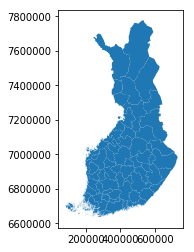

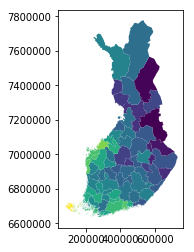

In [28]:
# Plot the geodataframe geometries:
geodata.plot()

# Define which variable to plot
geodata.plot(column="tyollisyys")


Adjusting the figure, we need to import matplotlib pyplot

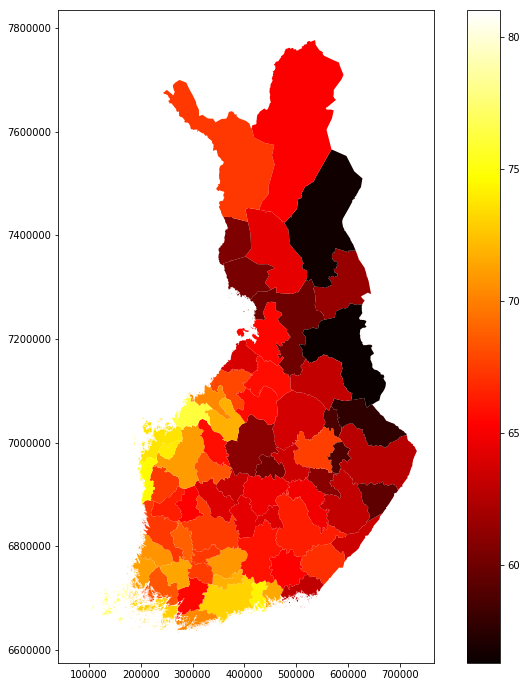

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# Adjust figure size
fig, ax = plt.subplots(1, figsize=(12, 12))

# Adjust colors and add a legend
geodata.plot(ax = ax, column="tyollisyys", cmap = "hot", legend = True)

## Create an interactive map

Next, we'll plot an interactive map based on the same data, and usign the folium library, which enables us to create maps based on the JavaScript library leaflet.js.

In [36]:
# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
geodata['geoid'] = geodata.index.astype(str)

In [39]:
# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=8, control_scale=True)

m.choropleth(geo_data = geodata, 
                  data = geodata, 
                  columns=['geoid','tyollisyys'], 
                  key_on='feature.id', 
                  fill_color='RdYlBu', 
                  line_color='white',
                  line_weight=0,
                  legend_name= 'Employment rate in Finland')
m

We can also plot "tooltips" on the map, which show the values for each feature.

In [ ]:
folium.features.GeoJson(geodata,  name='Labels',
               style_function=lambda x: {'color':'transparent','fillColor':'transparent','weight':0},
                tooltip=folium.features.GeoJsonTooltip(fields=['tyollisyys'],
                                              aliases = ['Employment rate'],
                                              labels=True,
                                              sticky=False
                                             )
                       ).add_to(m)

m

Create a styling function with a classification scheme:

In [41]:
import branca

# Create a series (or a dictionary?) out of the variable that you want to map
employed_series = data.set_index('seutukunta')['tyollisyys']

# Setl colorscale
colorscale = branca.colormap.linear.RdYlBu_05.to_step(data = geodata['tyollisyys'], n = 6, method = 'quantiles')

#Define style function
def my_color_function(feature):
    
   employed = employed_series.get(int(feature['id']), None)

   return {
       'fillOpacity': 0.5,
       'weight': 0,
       'fillColor': '#black' if employed is None else colorscale(employed)
       }

Plot the polygons, apply the classification scheme and add tooltips

In [43]:
# Based on :
#https://python-visualization.github.io/folium/quickstart.html
#https://github.com/python-visualization/folium/blob/master/examples/Colormaps.ipynb


# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=6, control_scale=True)

# add geojson layer on the map, which visualizes the polygons based on your style function, and additional parameters  
folium.GeoJson(
   geodata,
   name = "Employment rate in Finland (2013)",
   style_function=my_color_function,
   tooltip=folium.features.GeoJsonTooltip(fields=['nimi','tyollisyys'],
                                             aliases = ['Region','Employment rate (%)'],
                                             labels=True,
                                             sticky=True)
).add_to(m)


#Add a legend
colorscale .caption = 'Employment rate (%)'
m.add_child(colorscale )

# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)

#Show map
m

NameError: name 'colormap' is not defined